In [117]:
import pandas as pd

dataset = pd.read_csv("YRBS_rev2.csv")

In [118]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q95,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,1,88.16,4.97,111,270530,5,2015
1,7,2,4,1,1,1,1,1,1,1.73,...,8,1,1,1,67.56,3.93,111,270530,7,2015
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,1,11.21,5.01,111,270530,9,2015
3,4,2,2,1,1,1,1,1,2,1.78,...,4,1,2,1,68.28,4.02,111,270530,13,2015
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,1,3,68.88,4.01,111,270530,15,2015


In [119]:
colq88 = dataset["q88"]
dataset.drop(labels=['q88'], axis=1, inplace = True)
dataset.insert(123, 'q88', colq88)

In [120]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year,q88
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,88.16,4.97,111,270530,5,2015,1
1,7,2,4,1,1,1,1,1,1,1.73,...,1,1,1,67.56,3.93,111,270530,7,2015,3
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,11.21,5.01,111,270530,9,2015,2
3,4,2,2,1,1,1,1,1,2,1.78,...,1,2,1,68.28,4.02,111,270530,13,2015,4
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,3,68.88,4.01,111,270530,15,2015,4


In [121]:
dataset.drop(labels=['q6', 'q7','q8','q9','q10','q11', 'q12', 'q13','q14', 'q15', 'q16', 'q17',
                     'q18', 'q19', 'q21', 'q22','q29','q30', 'q32','q33','q37', 'q38','q40', 'q42','q43','q46','q47',
                     'q48','q49','q50','q51','q52','q53','q54','q55',
                     'q56','q57','q59','q62','q61','q63','q67','q69','q70','q71','q72','q73','q74','q75',
                     'q76','q81','q82','q84','q86','q87','q91','q92','q93','q94','q95','q96',
                     'q99','BMIPCT'], axis=1, inplace = True)

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15307 entries, 0 to 15306
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       15307 non-null  int64  
 1   q2       15307 non-null  int64  
 2   q3       15307 non-null  int64  
 3   q4       15307 non-null  int64  
 4   q5_1     15307 non-null  int64  
 5   q5_2     15307 non-null  int64  
 6   q5_3     15307 non-null  int64  
 7   q5_4     15307 non-null  int64  
 8   q5_5     15307 non-null  int64  
 9   q23      15307 non-null  int64  
 10  q24      15307 non-null  int64  
 11  q25      15307 non-null  int64  
 12  q26      15307 non-null  int64  
 13  q27      15307 non-null  int64  
 14  q28      15307 non-null  int64  
 15  q35      15307 non-null  int64  
 16  q36_2    15307 non-null  int64  
 17  q36_3    15307 non-null  int64  
 18  q36_4    15307 non-null  int64  
 19  q36_5    15307 non-null  int64  
 20  q36_6    15307 non-null  int64  
 21  q36_7    153

In [123]:
dataset['q88'].describe()

count    15307.000000
mean         3.598942
std          1.299843
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: q88, dtype: float64

In [124]:
dataset['q88'] = dataset.q88.astype('category')

In [125]:
y = dataset["q88"]
X = dataset.drop(labels=['q88'], axis=1, inplace = True)
X = dataset

In [126]:
#time = 35.00

y.unique()

[1, 3, 2, 4, 6, 5, 7]
Categories (7, int64): [1, 3, 2, 4, 6, 5, 7]

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(random_state=42)
RF_dt= RF_clf.fit(X_train, y_train)

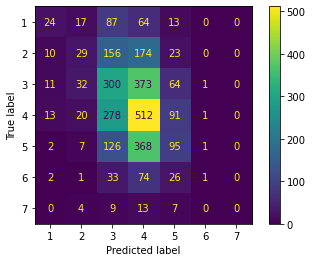

In [131]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RF_clf, X_test, y_test)

In [133]:
from sklearn.metrics import accuracy_score

pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.31384715871979096

criterion= "entropy" instead criterion= "gini"

In [134]:
RF_clf = RandomForestClassifier(random_state=42, criterion= "entropy" )
RF_dt= RF_clf.fit(X_train, y_train)

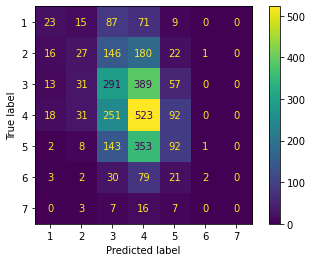

In [135]:
plot_confusion_matrix(RF_clf, X_test, y_test)

In [136]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.31286740692357934

In [137]:
RF_clf = RandomForestClassifier(random_state=42, n_estimators= 50 )
RF_dt= RF_clf.fit(X_train, y_train)

In [138]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.2952318745917701

In [139]:
RF_clf = RandomForestClassifier(random_state=42, n_estimators= 90 )
RF_dt= RF_clf.fit(X_train, y_train)

In [140]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.31678641410842584

In [141]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=20 )
RF_dt= RF_clf.fit(X_train, y_train)

In [142]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.31450032658393207

In [143]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=10 )
RF_dt= RF_clf.fit(X_train, y_train)

In [144]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.3154800783801437

In [145]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=5 )
RF_dt= RF_clf.fit(X_train, y_train)

In [146]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.3118876551273677

In [147]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=8 )
RF_dt= RF_clf.fit(X_train, y_train)

In [149]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.3161332462442848

In [150]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=7 )
RF_dt= RF_clf.fit(X_train, y_train)

In [151]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.31450032658393207

max_depth = 9 is the best accuracy result "0.319"

In [153]:
RF_clf = RandomForestClassifier(random_state=42, max_depth=9 )
RF_dt= RF_clf.fit(X_train, y_train)

In [154]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.31907250163291967

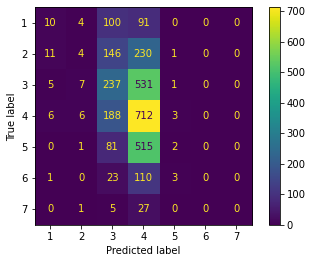

In [159]:
plot_confusion_matrix(RF_clf, X_test, y_test)